## Fashion MNIST 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print("The shape of the train_data is: ",train_images.shape)
print("The shape of the test_data is: ",test_images.shape)

The shape of the train_data is:  (60000, 28, 28)
The shape of the test_data is:  (10000, 28, 28)


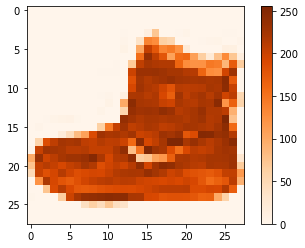

In [11]:
plt.figure()
plt.imshow(train_images[0], cmap='Oranges')
plt.colorbar()
plt.grid(False)
plt.show()

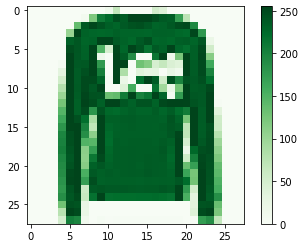

In [10]:
plt.figure()
plt.imshow(test_images[1], cmap='Greens')
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

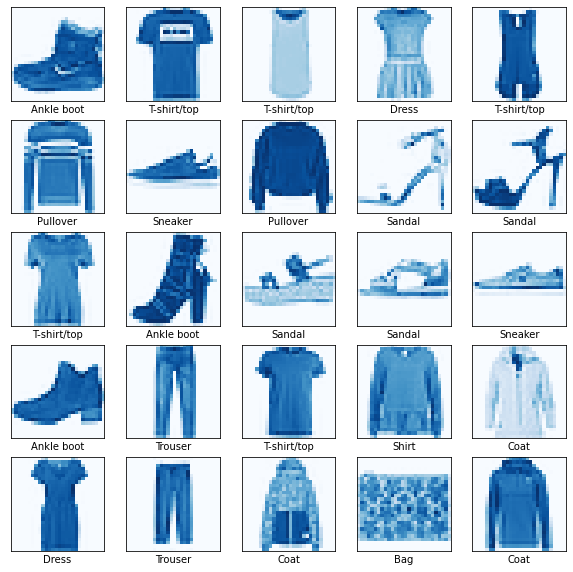

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Blues')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
#Build a sequential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4988 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3754 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3361 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2959 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2813 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2681 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2594 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2485 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8758


[0.3478013873100281, 0.8758000135421753]

In [19]:
#Making predictions using the model

import numpy as np
x_new = test_images[:10]
y_pred = model.predict_classes(x_new)
print(y_pred)
y_new = test_labels[:10]
y_new

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9 2 1 1 0 1 4 6 5 7]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n Test Accuracy: ", test_acc)

313/313 - 1s - loss: 0.3478 - accuracy: 0.8758

 Test Accuracy:  0.8758000135421753


In [22]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
np.argmax(predictions[0])

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else: 
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100* np.max(predictions_array),
                                        class_names[true_label]), color=color)
        
def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks()
    plt.yticks()
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

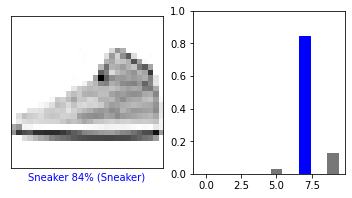

In [41]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

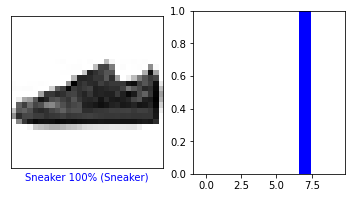

In [42]:
i=22
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

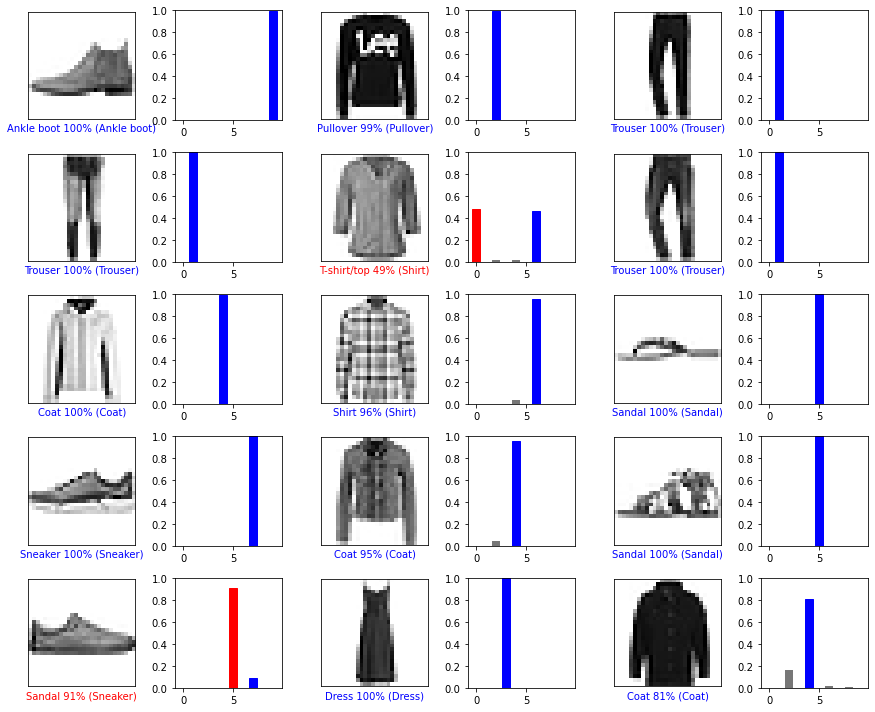

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions[i], test_labels, test_images)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
